In [ ]:
!pip install connectivipy

In [ ]:
!pip install mne

In [ ]:
!pip install netsci

In [ ]:
!pip install infomap

In [7]:
from functions_3_4 import *

In [8]:
location_path = 'channel_locations.txt'
position=pd.read_csv(location_path, sep='\s+')

In [9]:
#data paths
open_eyes_path = 'S002R01.edf'
closed_eyes_path = 'S002R02.edf'

#Open_eyes
values_open ,channels_open,num_of_channels_open,num_of_samples_open,sample_freq_open = open_file(open_eyes_path)

#Closed_eyes
values_closed ,channels_closed,num_of_channels_closed,num_of_samples_closed,sample_freq_closed = open_file(closed_eyes_path)


Extracting EDF parameters from /content/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/usr/local/lib/python3.6/dist-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


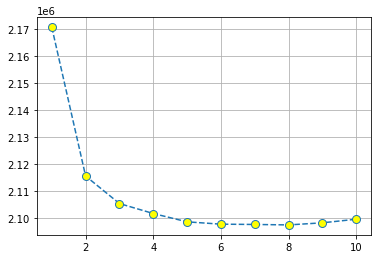


best model order p: 8



/usr/local/lib/python3.6/dist-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


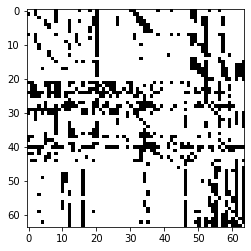

In [10]:
p_open = None
G_open = None
density_open = None
connectivity_matrix_open = None
binary_adjacency_matrix_open = None
freq_alpha_open = 10
connectivity_matrix_open, binary_adjacency_matrix_open, G_open = connectivity(freq_alpha_open,values=values_open,
                                                                      p=p_open,channels=channels_open,
                                                                      sample_freq=sample_freq_open,G=G_open,
                                                                      density=density_open,connectivity_matrix = connectivity_matrix_open,
                                                                      binary_adjacency_matrix=binary_adjacency_matrix_open,
                                                                      method='PDC', algorithm='yw',order=None,
                                                                      max_order=10,plot=True,resolution=100,threshold=0.2)
plt.imshow(binary_adjacency_matrix_open,cmap='Greys',interpolation='nearest')
plt.show()

/usr/local/lib/python3.6/dist-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


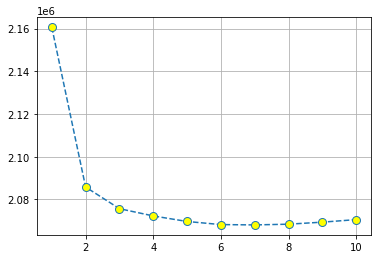


best model order p: 7



/usr/local/lib/python3.6/dist-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


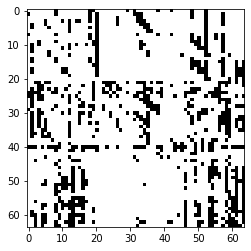

In [11]:
p_closed = None
G_closed = None
density_closed = None
connectivity_matrix_closed = None
binary_adjacency_matrix_closed = None
freq_alpha_closed = 10
connectivity_matrix_closed, binary_adjacency_matrix_closed, G_closed = connectivity(freq_alpha_closed,values=values_closed,
                                                                      p=p_closed,channels=channels_closed,
                                                                      sample_freq=sample_freq_closed,G=G_closed,
                                                                      density=density_closed,connectivity_matrix = connectivity_matrix_closed,
                                                                      binary_adjacency_matrix=binary_adjacency_matrix_closed,
                                                                      method='PDC', algorithm='yw',order=None,
                                                                      max_order=10,plot=True,resolution=100,threshold=0.2)
plt.imshow(binary_adjacency_matrix_closed,cmap='Greys',interpolation='nearest')
plt.show()

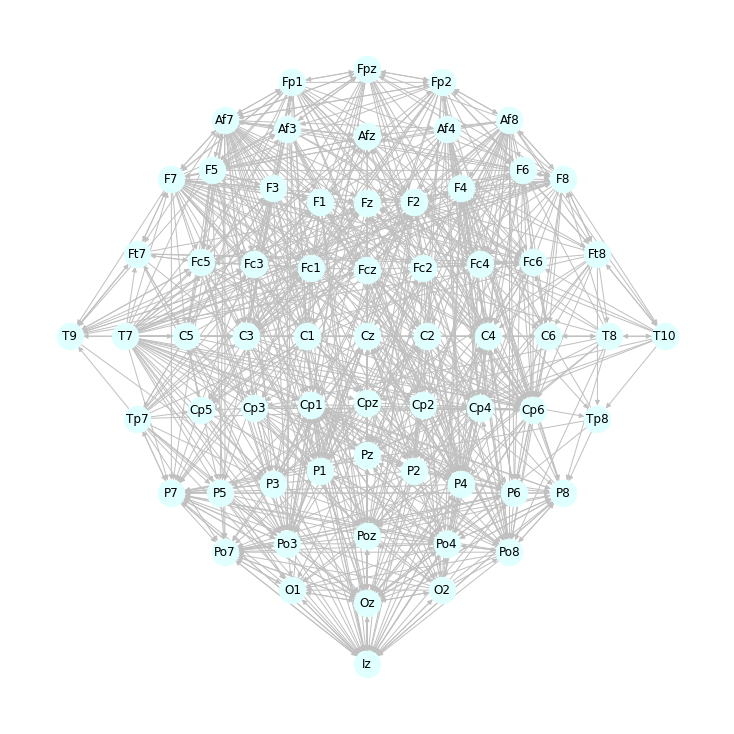

In [12]:
position['label']=channels_open
draw_Graph(binary_adjacency_matrix_open,position=position,channels=channels_open)

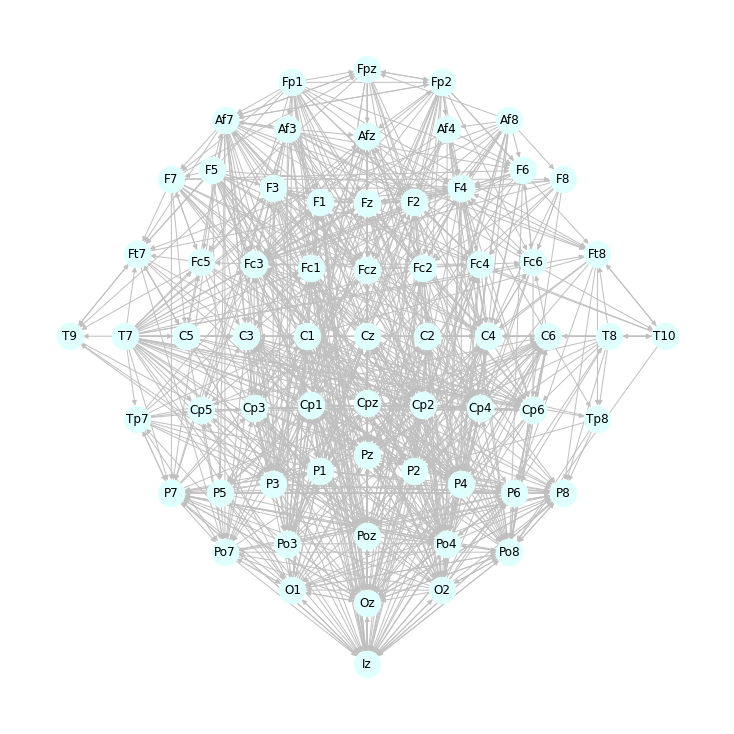

In [13]:
position['label']=channels_closed
draw_Graph(binary_adjacency_matrix_closed,position=position,channels=channels_closed)

# 3.1 


In [14]:
import netsci.models.random as nsr
import netsci.metrics.motifs as nsm
import netsci.visualization as nsv
import matplotlib.pyplot as plt
%matplotlib inline

[11899 15480  2292  2603  2611  2154  1501   684  1248   109   121   197
   218   359   162    26]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


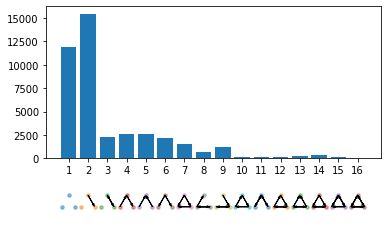

In [15]:
# 'brute-force' - the naive implementation using brute force algorithm. The complexity is high (O(|V|^3)), but it
# but it counts all 16 triplets.
motifs_broute_force_closed = nsm.motifs(binary_adjacency_matrix_closed.astype(int), algorithm='brute-force')
print(motifs_broute_force_closed)
nsv.bar_motifs(motifs_broute_force_closed)

[  -1   -1   -1 2603 2611 2154 1501  684 1248  109  121  197  218  359
  162   26]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


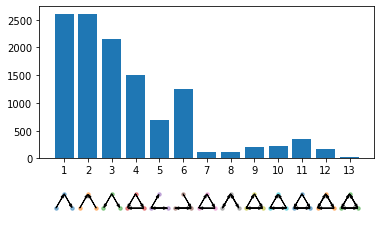

In [16]:
# 'louzoun' - an efficient algorithm for sparse networks. The complexity is low (O(|E|)), but it counts only the 13
# connected triplets (the first 3 entries will be -1).
motifs_louzoun_closed = nsm.motifs(binary_adjacency_matrix_closed.astype(int), algorithm='louzoun')
print(motifs_louzoun_closed)
nsv.bar_motifs(motifs_louzoun_closed)

[11303 15987  2045  2579  2714  2849  1781   634   849    53    72   111
   242   296   118    31]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


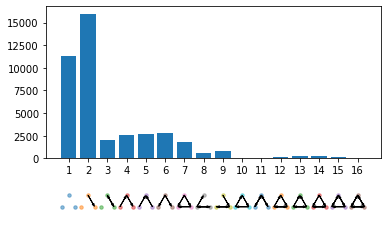

In [17]:
motifs_broute_force_open = nsm.motifs(binary_adjacency_matrix_open.astype(int), algorithm='brute-force')
print(motifs_broute_force_open)
nsv.bar_motifs(motifs_broute_force_open)

[  -1   -1   -1 2579 2714 2849 1781  634  849   53   72  111  242  296
  118   31]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


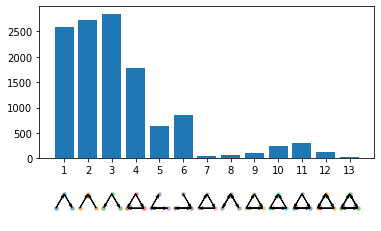

In [18]:
motifs_louzoun_open = nsm.motifs(binary_adjacency_matrix_open.astype(int), algorithm='louzoun')
print(motifs_louzoun_open)
nsv.bar_motifs(motifs_louzoun_open)

# 3.2
da terminare raffigurazione



(array([  -1,   -1,   -1, 2603, 2611, 2154, 1501,  684, 1248,  109,  121,
        197,  218,  359,  162,   26]), [[], [], [], [[0, 8, 25], [8, 50, 0], [8, 20, 0], [8, 55, 0], [0, 18, 24], [0, 18, 25], [18, 10, 0], [18, 11, 0], [18, 50, 0], [18, 51, 0], [18, 20, 0], [18, 62, 0], [18, 57, 0], [18, 61, 0], [18, 63, 0], [0, 19, 1], [0, 19, 7], [19, 12, 0], [19, 20, 0], [19, 57, 0], [19, 61, 0], [19, 63, 0], [0, 31, 7], [31, 33, 0], [31, 3, 0], [31, 35, 0], [31, 15, 0], [31, 50, 0], [31, 56, 0], [31, 57, 0], [31, 58, 0], [31, 59, 0], [31, 62, 0], [31, 63, 0], [0, 38, 1], [0, 38, 25], [38, 35, 0], [38, 51, 0], [38, 54, 0], [38, 55, 0], [38, 58, 0], [0, 42, 1], [0, 42, 24], [0, 42, 25], [0, 42, 40], [42, 49, 0], [0, 48, 25], [0, 48, 40], [48, 13, 0], [48, 46, 0], [48, 49, 0], [48, 53, 0], [48, 54, 0], [48, 55, 0], [48, 56, 0], [48, 58, 0], [48, 61, 0], [48, 63, 0], [0, 52, 24], [0, 52, 40], [52, 46, 0], [52, 54, 0], [52, 58, 0], [52, 61, 0], [52, 63, 0], [1, 0, 4], [1, 0, 5], [1, 0, 10], [1, 

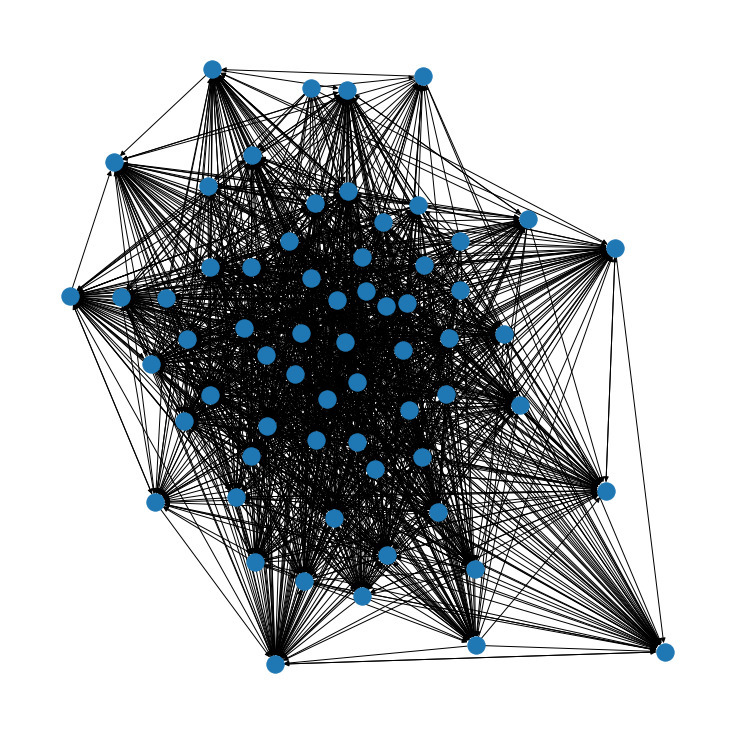

In [19]:
motifs_louzoun_closed = nsm.motifs(binary_adjacency_matrix_closed.astype(int), algorithm='louzoun',participation=True)
print(motifs_louzoun_closed)
G_only_motif_closed, Adj_only_motif_closed=create_grapf_motifs(motifs_louzoun=motifs_louzoun_closed)
f = plt.figure(figsize=(10, 10))
nx.draw(G_only_motif_closed)
plt.show()

(array([  -1,   -1,   -1, 2579, 2714, 2849, 1781,  634,  849,   53,   72,
        111,  242,  296,  118,   31]), [[], [], [], [[0, 2, 21], [0, 2, 37], [2, 33, 0], [2, 3, 0], [2, 19, 0], [2, 51, 0], [2, 52, 0], [2, 26, 0], [2, 57, 0], [0, 8, 37], [8, 14, 0], [8, 52, 0], [8, 57, 0], [0, 15, 1], [0, 15, 7], [0, 15, 21], [0, 15, 29], [0, 15, 37], [0, 15, 40], [15, 14, 0], [15, 16, 0], [15, 19, 0], [15, 52, 0], [15, 57, 0], [15, 63, 0], [0, 18, 1], [0, 18, 7], [0, 18, 29], [0, 18, 37], [18, 50, 0], [18, 51, 0], [18, 52, 0], [18, 57, 0], [18, 58, 0], [18, 61, 0], [18, 62, 0], [18, 63, 0], [0, 20, 29], [0, 20, 40], [20, 52, 0], [20, 54, 0], [20, 58, 0], [20, 59, 0], [20, 61, 0], [20, 63, 0], [0, 31, 21], [0, 31, 24], [0, 31, 37], [31, 32, 0], [31, 46, 0], [31, 61, 0], [31, 63, 0], [0, 48, 21], [0, 48, 24], [0, 48, 29], [0, 48, 37], [48, 34, 0], [48, 11, 0], [48, 46, 0], [48, 55, 0], [48, 58, 0], [48, 61, 0], [48, 63, 0], [0, 49, 21], [0, 49, 29], [0, 49, 37], [0, 49, 40], [49, 34, 0], [49, 4,

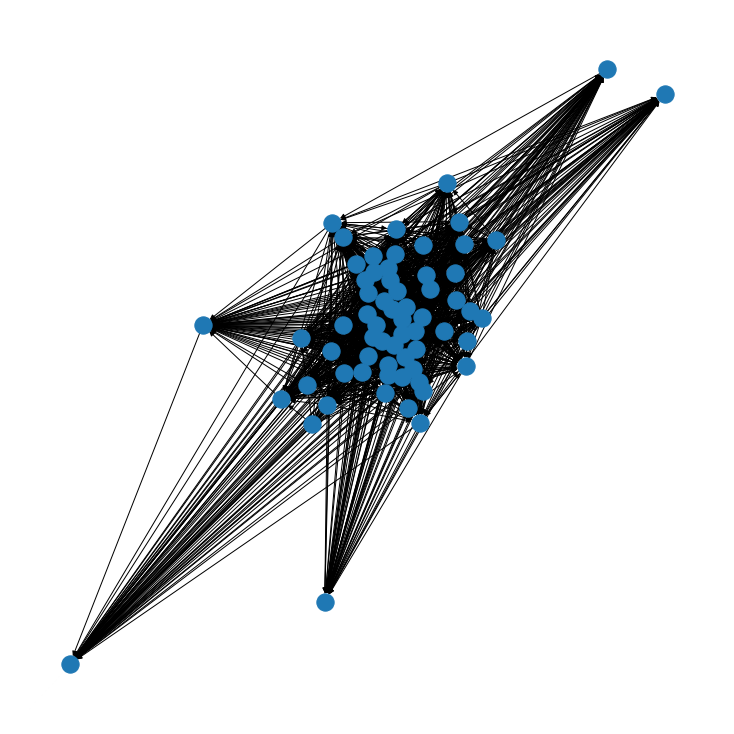

In [20]:
motifs_louzoun_open = nsm.motifs(binary_adjacency_matrix_open.astype(int), algorithm='louzoun',participation=True)
print(motifs_louzoun_open)
G_only_motif_open, Adj_only_motif_open=create_grapf_motifs(motifs_louzoun=motifs_louzoun_open)
f = plt.figure(figsize=(10, 10))
nx.draw(G_only_motif_open)
plt.show()

# 4.1-4.2
Louvain algorithm

In [21]:
import community as community_louvain

In [22]:
#4.1
G_closed_undirected=G_closed.to_undirected()
community_closed=community_louvain.best_partition(G_closed_undirected)
print(community_closed)

{0: 0, 1: 3, 2: 2, 3: 2, 4: 3, 5: 3, 6: 3, 7: 0, 8: 4, 9: 4, 10: 3, 11: 3, 12: 3, 13: 4, 14: 4, 15: 4, 16: 4, 17: 3, 18: 0, 19: 3, 20: 3, 21: 2, 22: 2, 23: 3, 24: 2, 25: 2, 26: 2, 27: 3, 28: 3, 29: 0, 30: 0, 31: 0, 32: 2, 33: 2, 34: 3, 35: 3, 36: 3, 37: 3, 38: 0, 39: 1, 40: 0, 41: 1, 42: 0, 43: 1, 44: 4, 45: 1, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 1, 52: 3, 53: 4, 54: 4, 55: 4, 56: 2, 57: 4, 58: 4, 59: 4, 60: 4, 61: 4, 62: 4, 63: 4}


In [23]:
G_open_undirected=G_open.to_undirected()
community_open=community_louvain.best_partition(G_open_undirected)
print(community_open)

{0: 0, 1: 0, 2: 0, 3: 2, 4: 2, 5: 2, 6: 2, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 2, 13: 2, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 2, 20: 2, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 2, 27: 2, 28: 2, 29: 0, 30: 0, 31: 0, 32: 0, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 0, 39: 2, 40: 0, 41: 2, 42: 0, 43: 2, 44: 0, 45: 1, 46: 1, 47: 1, 48: 0, 49: 1, 50: 1, 51: 1, 52: 2, 53: 1, 54: 1, 55: 1, 56: 0, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1}


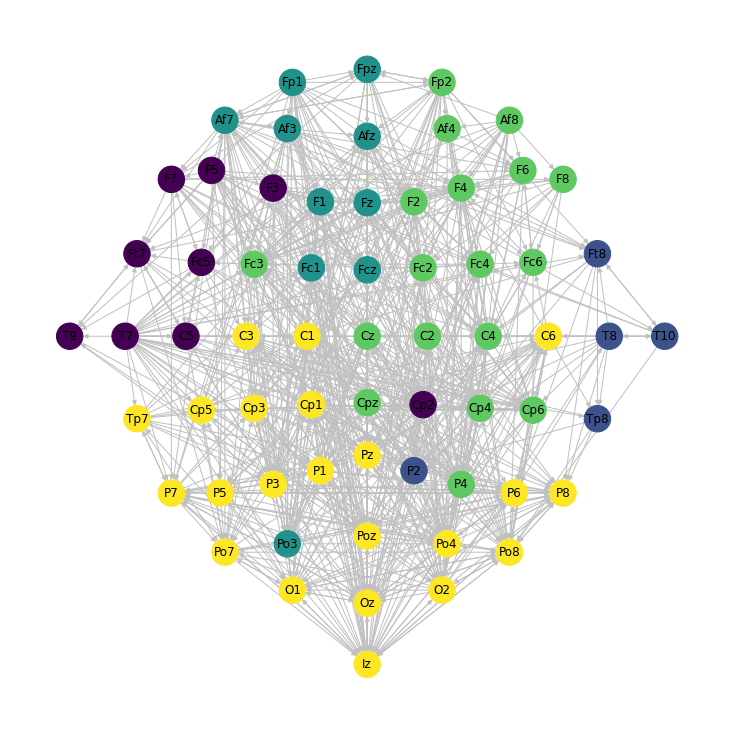

In [24]:
#4.2
values = [community_closed.get(node, 0.25) for node in G_closed.nodes()]
position['label']=channels_closed
draw_Graph_values(G_closed,position=position,channels=channels_closed, values=values)

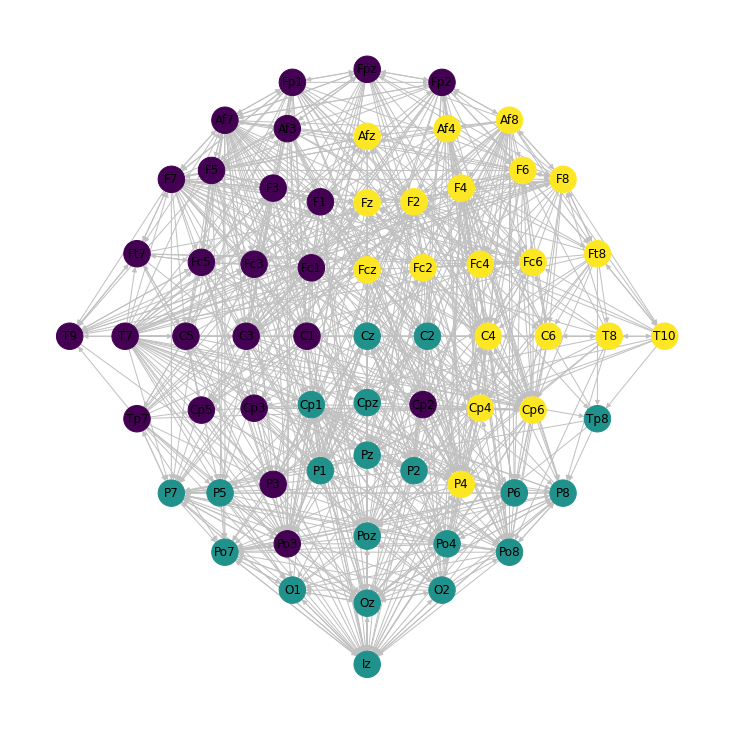

In [25]:
values = [community_open.get(node, 0.25) for node in G_open.nodes()]
position['label']=channels_open
draw_Graph_values(G_open,position=position,channels=channels_open, values=values)

# 4.3
Map equation method

In [27]:
communities_open=get_communities_infomap(G_open)
print(communities_open)

{63: 0, 61: 0, 55: 0, 46: 0, 52: 0, 58: 0, 16: 0, 12: 0, 57: 0, 20: 0, 54: 0, 56: 0, 53: 0, 60: 0, 10: 0, 50: 0, 34: 0, 59: 0, 35: 0, 51: 0, 62: 0, 8: 0, 49: 0, 48: 0, 6: 0, 3: 0, 33: 0, 19: 0, 44: 0, 11: 0, 2: 0, 18: 0, 13: 0, 26: 0, 32: 0, 5: 0, 31: 0, 15: 0, 36: 0, 14: 0, 4: 0, 0: 0, 1: 0, 42: 0, 47: 0, 7: 0, 38: 0, 37: 1, 29: 1, 22: 1, 24: 1, 9: 1, 25: 1, 23: 1, 41: 1, 30: 1, 39: 1, 17: 1, 43: 1, 21: 1, 45: 1, 28: 1, 27: 1, 40: 1}


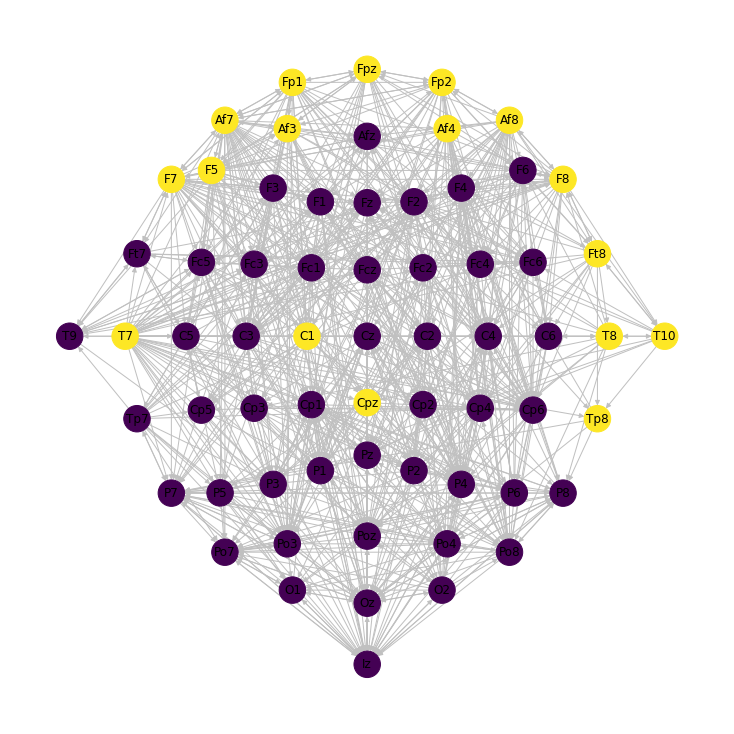

In [28]:
values = [communities_open.get(node, 0.25) for node in G_open.nodes()]
position['label']=channels_open
draw_Graph_values(G_open,position=position,channels=channels_open, values=values)

In [29]:
communities_closed=get_communities_infomap(G_closed)
print(communities_closed)

{63: 0, 61: 0, 52: 0, 59: 0, 20: 0, 57: 0, 8: 0, 12: 0, 13: 0, 53: 0, 58: 0, 54: 0, 50: 0, 1: 0, 46: 0, 16: 0, 35: 0, 48: 0, 49: 0, 9: 0, 60: 0, 10: 0, 5: 0, 4: 0, 18: 0, 62: 0, 33: 0, 19: 0, 32: 0, 11: 0, 55: 0, 34: 0, 6: 0, 15: 0, 56: 0, 2: 0, 3: 0, 26: 0, 14: 0, 51: 0, 17: 0, 31: 0, 45: 0, 36: 0, 44: 0, 27: 0, 0: 1, 38: 1, 42: 1, 7: 1, 29: 1, 39: 2, 24: 2, 22: 2, 41: 2, 43: 2, 23: 2, 25: 2, 21: 2, 40: 2, 47: 3, 37: 3, 28: 3, 30: 3}


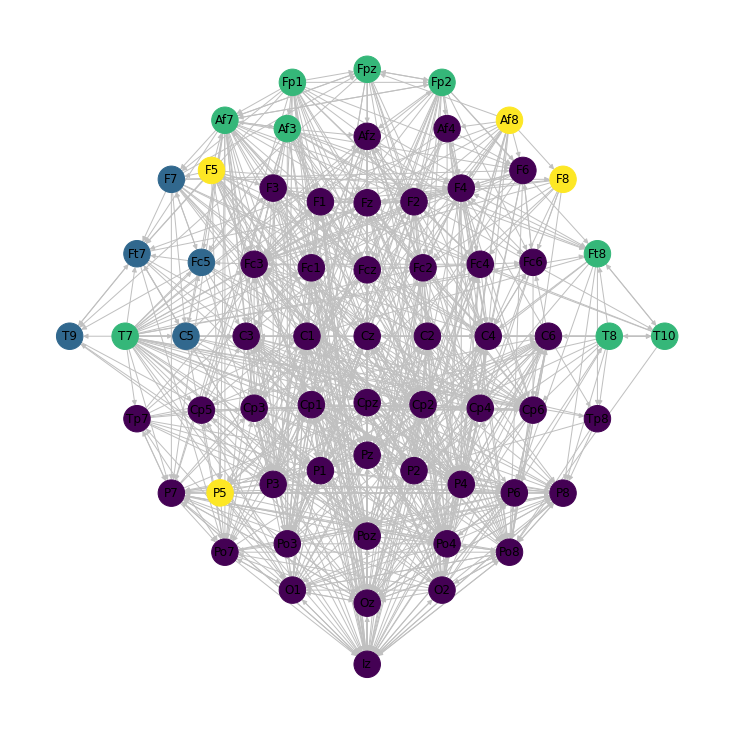

In [30]:
values = [communities_closed.get(node, 0.25) for node in G_closed.nodes()]
position['label']=channels_closed
draw_Graph_values(G_closed,position=position,channels=channels_closed, values=values)